# Clean and Analyze Employee Exit Surveys

In this guided project, we'll work with exit surveys from employees of the Department of Education, Training and Employment (DETE) and the Technical and Further Education (TAFE) institute in Queensland, Australia.

In this project, we'll play the role of data analyst and pretend our stakeholders want to know the following:

* Are employees who only worked for the institutes for a short period of time resigning due to some kind of dissatisfaction? What about employees who have been there longer?
* Are younger employees resigning due to some kind of dissatisfaction? What about older employees?

A data dictionary wasn't provided with the dataset. In a job setting, we'd make sure to meet with a manager to confirm the definitions of the data. 

Let's start by reading the datasets into pandas and exploring them.

In [392]:
import pandas as pd
import numpy as np

In [584]:
dete_survey = pd.read_csv('dete_survey.csv')
tafe_survey = pd.read_csv('tafe_survey.csv')

In [585]:
print(dete_survey.info())
print(tafe_survey.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 822 entries, 0 to 821
Data columns (total 56 columns):
 #   Column                               Non-Null Count  Dtype 
---  ------                               --------------  ----- 
 0   ID                                   822 non-null    int64 
 1   SeparationType                       822 non-null    object
 2   Cease Date                           822 non-null    object
 3   DETE Start Date                      822 non-null    object
 4   Role Start Date                      822 non-null    object
 5   Position                             817 non-null    object
 6   Classification                       455 non-null    object
 7   Region                               822 non-null    object
 8   Business Unit                        126 non-null    object
 9   Employment Status                    817 non-null    object
 10  Career move to public sector         822 non-null    bool  
 11  Career move to private sector        822 non-

In [586]:
dete_survey.head()

,ID,SeparationType,Cease Date,DETE Start Date,Role Start Date,Position,Classification,Region,Business Unit,Employment Status,...,Kept informed,Wellness programs,Health & Safety,Gender,Age,Aboriginal,Torres Strait,South Sea,Disability,NESB
0,1,Ill Health Retirement,08/2012,1984,2004,Public Servant,A01-A04,Central Office,Corporate Strategy and Peformance,Permanent Full-time,...,N,N,N,Male,56-60,NaN,NaN,NaN,NaN,Yes
1,2,Voluntary Early Retirement (VER),08/2012,Not Stated,Not Stated,Public Servant,AO5-AO7,Central Office,Corporate Strategy and Peformance,Permanent Full-time,...,N,N,N,Male,56-60,NaN,NaN,NaN,NaN,NaN
2,3,Voluntary Early Retirement (VER),05/2012,2011,2011,Schools Officer,NaN,Central Office,Education Queensland,Permanent Full-time,...,N,N,N,Male,61 or older,NaN,NaN,NaN,NaN,NaN
3,4,Resignation-Other reasons,05/2012,2005,2006,Teacher,Primary,Central Queensland,NaN,Permanent Full-time,...,A,N,A,Female,36-40,NaN,NaN,NaN,NaN,NaN
4,5,Age Retirement,05/2012,1970,1989,Head of Curriculum/Head of Special Education,NaN,South East,NaN,Permanent Full-time,...,N,A,M,Female,61 or older,NaN,NaN,NaN,NaN,NaN


In [587]:
tafe_survey.head()

,Record ID,Institute,WorkArea,CESSATION YEAR,Reason for ceasing employment,Contributing Factors. Career Move - Public Sector,Contributing Factors. Career Move - Private Sector,Contributing Factors. Career Move - Self-employment,Contributing Factors. Ill Health,Contributing Factors. Maternity/Family,...,Workplace. Topic:Does your workplace promote a work culture free from all forms of unlawful discrimination?,Workplace. Topic:Does your workplace promote and practice the principles of employment equity?,Workplace. Topic:Does your workplace value the diversity of its employees?,Workplace. Topic:Would you recommend the Institute as an employer to others?,Gender. What is your Gender?,CurrentAge. Current Age,Employment Type. Employment Type,Classification. Classification,LengthofServiceOverall. Overall Length of Service at Institute (in years),LengthofServiceCurrent. Length of Service at current workplace (in years)
0,6.341330e+17,Southern Queensland Institute of TAFE,Non-Delivery (corporate),2010.0,Contract Expired,NaN,NaN,NaN,NaN,NaN,...,Yes,Yes,Yes,Yes,Female,26 30,Temporary Full-time,Administration (AO),1-2,1-2
1,6.341337e+17,Mount Isa Institute of TAFE,Non-Delivery (corporate),2010.0,Retirement,-,-,-,-,-,...,Yes,Yes,Yes,Yes,NaN,NaN,NaN,NaN,NaN,NaN
2,6.341388e+17,Mount Isa Institute of TAFE,Delivery (teaching),2010.0,Retirement,-,-,-,-,-,...,Yes,Yes,Yes,Yes,NaN,NaN,NaN,NaN,NaN,NaN
3,6.341399e+17,Mount Isa Institute of TAFE,Non-Delivery (corporate),2010.0,Resignation,-,-,-,-,-,...,Yes,Yes,Yes,Yes,NaN,NaN,NaN,NaN,NaN,NaN
4,6.341466e+17,Southern Queensland Institute of TAFE,Delivery (teaching),2010.0,Resignation,-,Career Move - Private Sector,-,-,-,...,Yes,Yes,Yes,Yes,Male,41 45,Permanent Full-time,Teacher (including LVT),3-4,3-4


We notice that many of the same columns in each dataframe have different names which we will need to change in order to join the datasets. We'll analyze closer the columns which are of most interest to us.

In [588]:
dete_cols = ['ID',"SeparationType", "Cease Date", "DETE Start Date"]
tafe_cols = ['Record ID', 'Reason for ceasing employment', 'LengthofServiceOverall. Overall Length of Service at Institute (in years)' ]

In [589]:
for col in dete_cols[1:]:
    print(dete_survey[col].value_counts(dropna=False))
    print("\n")

Age Retirement                          285
Resignation-Other reasons               150
Resignation-Other employer               91
Resignation-Move overseas/interstate     70
Voluntary Early Retirement (VER)         67
Ill Health Retirement                    61
Other                                    49
Contract Expired                         34
Termination                              15
Name: SeparationType, dtype: int64


2012          344
2013          200
01/2014        43
12/2013        40
Not Stated     34
09/2013        34
06/2013        27
07/2013        22
10/2013        20
11/2013        16
08/2013        12
05/2013         7
05/2012         6
04/2014         2
07/2014         2
04/2013         2
08/2012         2
02/2014         2
09/2010         1
11/2012         1
2014            1
2010            1
07/2006         1
09/2014         1
07/2012         1
Name: Cease Date, dtype: int64


Not Stated    73
2011          40
2007          34
2008          31
2012          27

In the `Cease Date` and `DETE Start` column for DETE survey we notice we have values as "Not Stated" and the dates are in different formats for the `Cease Date` column.

In [590]:
for col in tafe_cols[1:]:
    print(tafe_survey[col].value_counts(dropna=False))
    print("\n")

Resignation                 340
Contract Expired            127
Retrenchment/ Redundancy    104
Retirement                   82
Transfer                     25
Termination                  23
NaN                           1
Name: Reason for ceasing employment, dtype: int64


Less than 1 year      147
NaN                   106
1-2                   102
3-4                    96
11-20                  89
More than 20 years     71
5-6                    48
7-10                   43
Name: LengthofServiceOverall. Overall Length of Service at Institute (in years), dtype: int64




We'll read the first survey again making "Not Stated" values as `NaN`.

In [591]:
dete_survey = pd.read_csv('dete_survey.csv', na_values ='Not Stated')

In [592]:
dete_survey["Cease Date"].value_counts(dropna = False)

2012       344
2013       200
01/2014     43
12/2013     40
NaN         34
09/2013     34
06/2013     27
07/2013     22
10/2013     20
11/2013     16
08/2013     12
05/2013      7
05/2012      6
04/2014      2
07/2014      2
04/2013      2
08/2012      2
02/2014      2
09/2010      1
11/2012      1
2014         1
2010         1
07/2006      1
09/2014      1
07/2012      1
Name: Cease Date, dtype: int64

Next, we'll drop the columns which we will not be workign with.

In [593]:
dete_survey_updated = dete_survey.drop(dete_survey.columns[28:49], axis=1)
tafe_survey_updated = tafe_survey.drop(tafe_survey.columns[17:66], axis=1)

We want to combine the dataframes so we'll have to standardize the column names.

In [594]:
print(dete_survey_updated.columns)

Index(['ID', 'SeparationType', 'Cease Date', 'DETE Start Date',
       'Role Start Date', 'Position', 'Classification', 'Region',
       'Business Unit', 'Employment Status', 'Career move to public sector',
       'Career move to private sector', 'Interpersonal conflicts',
       'Job dissatisfaction', 'Dissatisfaction with the department',
       'Physical work environment', 'Lack of recognition',
       'Lack of job security', 'Work location', 'Employment conditions',
       'Maternity/family', 'Relocation', 'Study/Travel', 'Ill Health',
       'Traumatic incident', 'Work life balance', 'Workload',
       'None of the above', 'Gender', 'Age', 'Aboriginal', 'Torres Strait',
       'South Sea', 'Disability', 'NESB'],
      dtype='object')


In [595]:
dete_survey_updated.columns = (dete_survey_updated.columns
                               .str.replace('_', "")
                               .str.strip()
                               .str.lower())

In [596]:
print(dete_survey_updated.columns)

Index(['id', 'separationtype', 'cease date', 'dete start date',
       'role start date', 'position', 'classification', 'region',
       'business unit', 'employment status', 'career move to public sector',
       'career move to private sector', 'interpersonal conflicts',
       'job dissatisfaction', 'dissatisfaction with the department',
       'physical work environment', 'lack of recognition',
       'lack of job security', 'work location', 'employment conditions',
       'maternity/family', 'relocation', 'study/travel', 'ill health',
       'traumatic incident', 'work life balance', 'workload',
       'none of the above', 'gender', 'age', 'aboriginal', 'torres strait',
       'south sea', 'disability', 'nesb'],
      dtype='object')


In [597]:
print(tafe_survey_updated.columns)

Index(['Record ID', 'Institute', 'WorkArea', 'CESSATION YEAR',
       'Reason for ceasing employment',
       'Contributing Factors. Career Move - Public Sector ',
       'Contributing Factors. Career Move - Private Sector ',
       'Contributing Factors. Career Move - Self-employment',
       'Contributing Factors. Ill Health',
       'Contributing Factors. Maternity/Family',
       'Contributing Factors. Dissatisfaction',
       'Contributing Factors. Job Dissatisfaction',
       'Contributing Factors. Interpersonal Conflict',
       'Contributing Factors. Study', 'Contributing Factors. Travel',
       'Contributing Factors. Other', 'Contributing Factors. NONE',
       'Gender. What is your Gender?', 'CurrentAge. Current Age',
       'Employment Type. Employment Type', 'Classification. Classification',
       'LengthofServiceOverall. Overall Length of Service at Institute (in years)',
       'LengthofServiceCurrent. Length of Service at current workplace (in years)'],
      dtype='ob

We'll rename the main columns so it matches those in DETE survey.

In [598]:
cols = {'Record ID': 'id', 'CESSATION YEAR': 'cease date', 'Reason for ceasing employment': 'separationtype',
       'Gender. What is your Gender?': 'gender', 'CurrentAge. Current Age': 'age', 'Employment Type. Employment Type': 'employment_status',
        'Classification. Classification': 'position', 'LengthofServiceOverall. Overall Length of Service at Institute (in years)': 'institute_service',
        'LengthofServiceCurrent. Length of Service at current workplace (in years)': 'role_service'
    }

In [599]:
tafe_survey_updated.rename(cols, axis=1, inplace=True)

In [600]:
print(tafe_survey_updated.columns)

Index(['id', 'Institute', 'WorkArea', 'cease date', 'separationtype',
       'Contributing Factors. Career Move - Public Sector ',
       'Contributing Factors. Career Move - Private Sector ',
       'Contributing Factors. Career Move - Self-employment',
       'Contributing Factors. Ill Health',
       'Contributing Factors. Maternity/Family',
       'Contributing Factors. Dissatisfaction',
       'Contributing Factors. Job Dissatisfaction',
       'Contributing Factors. Interpersonal Conflict',
       'Contributing Factors. Study', 'Contributing Factors. Travel',
       'Contributing Factors. Other', 'Contributing Factors. NONE', 'gender',
       'age', 'employment_status', 'position', 'institute_service',
       'role_service'],
      dtype='object')


For this project, we'll only analyze survey respondents who resigned, so their separation type contains the string 'Resignation'

In [601]:
dete_survey_updated['separationtype'].value_counts(dropna=False)

Age Retirement                          285
Resignation-Other reasons               150
Resignation-Other employer               91
Resignation-Move overseas/interstate     70
Voluntary Early Retirement (VER)         67
Ill Health Retirement                    61
Other                                    49
Contract Expired                         34
Termination                              15
Name: separationtype, dtype: int64

In [602]:
tafe_survey_updated['separationtype'].value_counts(dropna=False)

Resignation                 340
Contract Expired            127
Retrenchment/ Redundancy    104
Retirement                   82
Transfer                     25
Termination                  23
NaN                           1
Name: separationtype, dtype: int64

In [603]:
dete_resignations = dete_survey_updated[dete_survey_updated['separationtype'].str.contains('Resignation')].copy()

In [604]:
tafe_resignations = tafe_survey_updated[tafe_survey_updated['separationtype'].str.contains('Resignation', na=False)].copy()


In [605]:
dete_survey_updated.head()

,id,separationtype,cease date,dete start date,role start date,position,classification,region,business unit,employment status,...,work life balance,workload,none of the above,gender,age,aboriginal,torres strait,south sea,disability,nesb
0,1,Ill Health Retirement,08/2012,1984.0,2004.0,Public Servant,A01-A04,Central Office,Corporate Strategy and Peformance,Permanent Full-time,...,False,False,True,Male,56-60,NaN,NaN,NaN,NaN,Yes
1,2,Voluntary Early Retirement (VER),08/2012,NaN,NaN,Public Servant,AO5-AO7,Central Office,Corporate Strategy and Peformance,Permanent Full-time,...,False,False,False,Male,56-60,NaN,NaN,NaN,NaN,NaN
2,3,Voluntary Early Retirement (VER),05/2012,2011.0,2011.0,Schools Officer,NaN,Central Office,Education Queensland,Permanent Full-time,...,False,False,True,Male,61 or older,NaN,NaN,NaN,NaN,NaN
3,4,Resignation-Other reasons,05/2012,2005.0,2006.0,Teacher,Primary,Central Queensland,NaN,Permanent Full-time,...,False,False,False,Female,36-40,NaN,NaN,NaN,NaN,NaN
4,5,Age Retirement,05/2012,1970.0,1989.0,Head of Curriculum/Head of Special Education,NaN,South East,NaN,Permanent Full-time,...,True,False,False,Female,61 or older,NaN,NaN,NaN,NaN,NaN


Next, we'll check the dates for any inconsistencies such as having the `cease_date` before `dete_start_date`.

In [606]:
dete_resignations['cease date'] = (dete_resignations['cease date']
                                   .str.split('/')
                                   .str[-1]
                                   .astype('float'))

In [607]:
for col in ['cease date', 'dete start date']:
    print(dete_resignations[col].value_counts().sort_index())
    print('\n')

2006.0      1
2010.0      2
2012.0    129
2013.0    146
2014.0     22
Name: cease date, dtype: int64


1963.0     1
1971.0     1
1972.0     1
1973.0     1
1974.0     2
1975.0     1
1976.0     2
1977.0     1
1980.0     5
1982.0     1
1983.0     2
1984.0     1
1985.0     3
1986.0     3
1987.0     1
1988.0     4
1989.0     4
1990.0     5
1991.0     4
1992.0     6
1993.0     5
1994.0     6
1995.0     4
1996.0     6
1997.0     5
1998.0     6
1999.0     8
2000.0     9
2001.0     3
2002.0     6
2003.0     6
2004.0    14
2005.0    15
2006.0    13
2007.0    21
2008.0    22
2009.0    13
2010.0    17
2011.0    24
2012.0    21
2013.0    10
Name: dete start date, dtype: int64




In [608]:
tafe_resignations['cease date'].value_counts().sort_index()

2009.0      2
2010.0     68
2011.0    116
2012.0     94
2013.0     55
Name: cease date, dtype: int64

The years look in reasonable ranges, altough the time period varies. To make the analysis comparable within the datasets we will only keep matching years, since there might be other reasons for leaving in the earlier years which might bias our analysis.

In [609]:
dete_resignations = dete_resignations[dete_resignations['cease date'] >=2009]

In [610]:
dete_resignations['cease date'].value_counts().sort_index()

2010.0      2
2012.0    129
2013.0    146
2014.0     22
Name: cease date, dtype: int64

Next, we will focus on the length of time an employee spent in the workplace. In the TAFE survey this is represented in the `institute_service` column. We need to create a corresponding `institute_service` column in `dete_resignations`.

In [611]:
tafe_resignations['institute_service'].value_counts(dropna=False)

Less than 1 year      73
1-2                   64
3-4                   63
NaN                   50
5-6                   33
11-20                 26
7-10                  21
More than 20 years    10
Name: institute_service, dtype: int64

In [612]:
dete_resignations['institute_service'] = dete_resignations['cease date'] - dete_resignations['dete start date']

Next, we'll identify any employees who resigned because they were dissatisfied.

Below are the columns we'll use to categorize employees as "dissatisfied" from each dataframe.

tafe_survey_updated:

* Contributing Factors. Dissatisfaction
* Contributing Factors. Job Dissatisfaction

dete_survey_updated:
* dete_survey_updated:
* job_dissatisfaction
* dissatisfaction_with_the_department
* physical_work_environment
* lack_of_recognition
* lack_of_job_security
* work_location
* employment_conditions
* work_life_balance
* workload

In [613]:
tafe_resignations['Contributing Factors. Dissatisfaction'].value_counts()

-                                         277
Contributing Factors. Dissatisfaction      55
Name: Contributing Factors. Dissatisfaction, dtype: int64

In [614]:
tafe_resignations['Contributing Factors. Job Dissatisfaction'].value_counts()

-                      270
Job Dissatisfaction     62
Name: Contributing Factors. Job Dissatisfaction, dtype: int64

In [615]:
#Build a function to update the values
def update_vals(row):
    if pd.isnull(row):
        return np.nan
    elif row =="-":
        return False
    else:
        return True
    
tafe_resignations[['Contributing Factors. Job Dissatisfaction',
                  'Contributing Factors. Dissatisfaction']] = tafe_resignations[['Contributing Factors. Job Dissatisfaction',
                  'Contributing Factors. Dissatisfaction']].applymap(update_vals)

We create a new column called `dissatisfied` if any of the above rows are True.

In [616]:
tafe_resignations['dissatisfied'] = tafe_resignations.copy()[['Contributing Factors. Job Dissatisfaction',
                  'Contributing Factors. Dissatisfaction']].any(axis=1, skipna=False)

In [617]:
tafe_resignations['dissatisfied'].value_counts()

False    241
True      91
Name: dissatisfied, dtype: int64

We do the same thing for the DETE Survey.

In [618]:
cols = ['job dissatisfaction', 'dissatisfaction with the department',
'physical work environment', 'lack of recognition', 'lack of job security',
'work location', 'employment conditions', 'work life balance', 'workload']

In [619]:
dete_resignations[cols] = dete_resignations[cols].applymap(update_vals)

In [620]:
dete_resignations['dissatisfied'] = dete_resignations[cols].any(axis=1, skipna=False)

In [621]:
dete_resignations['dissatisfied'].value_counts()

True    299
Name: dissatisfied, dtype: int64

To recap, we've accomplished the following:

* Renamed our columns
* Dropped any data not needed for our analysis
* Verified the quality of our data
* Created a new institute_service column
* Cleaned the Contributing Factors columns
* Created a new column indicating if an employee resigned because they were dissatisfied in some way

Next, we'll combine the datasets.

Let's add a column to each dataframe that will allow us to easily distinguish between the two.

In [622]:
dete_resignations['institute'] = "DETE"
tafe_resignations['institute'] = "DETE"

In [623]:
combined = pd.concat([dete_resignations, tafe_resignations], axis=0)

In [624]:
combined_updated = combined.dropna(thresh=500, axis=1)

In [625]:
combined_updated.head()

,id,separationtype,cease date,position,gender,age,institute_service,dissatisfied,institute
3,4.0,Resignation-Other reasons,2012.0,Teacher,Female,36-40,7,True,DETE
5,6.0,Resignation-Other reasons,2012.0,Guidance Officer,Female,41-45,18,True,DETE
8,9.0,Resignation-Other reasons,2012.0,Teacher,Female,31-35,3,True,DETE
9,10.0,Resignation-Other employer,2012.0,Teacher Aide,Female,46-50,15,True,DETE
11,12.0,Resignation-Move overseas/interstate,2012.0,Teacher,Male,31-35,3,True,DETE


In [626]:
combined_updated.shape

(639, 9)

After combining the datasets and removing columns with less than 500 non null values with are left with 9 columns.
But first, we need to clean up the `insitute_service` column.

In [627]:
combined_updated['institute_service'].value_counts(dropna=False)

NaN                   77
Less than 1 year      73
1-2                   64
3-4                   63
5-6                   33
11-20                 26
5.0                   23
1.0                   22
7-10                  21
3.0                   20
0.0                   19
6.0                   17
4.0                   16
2.0                   14
9.0                   14
7.0                   13
More than 20 years    10
8.0                    8
13.0                   8
15.0                   7
20.0                   7
10.0                   6
12.0                   6
22.0                   6
14.0                   6
17.0                   6
16.0                   5
18.0                   5
11.0                   4
23.0                   4
24.0                   4
19.0                   3
39.0                   3
21.0                   3
32.0                   3
28.0                   2
26.0                   2
25.0                   2
30.0                   2
36.0                   2


To analyze the data, we'll convert these numbers into categories.

* New: Less than 3 years at a company
* Experienced: 3-6 years at a company
* Established: 7-10 years at a company
* Veteran: 11 or more years at a company

In [631]:
years_of_service = combined_updated['institute_service'].copy()
years_of_service = years_of_service.astype('str')
years_of_service = (years_of_service
    .str.split('-')
    .str[0])

In [632]:
def categorize(element):
    if element == 'nan': 
        return np.nan
    elif 'Less than 1 year' in element:
        return 'New'
    elif 'More than 20 years' in element:
        return 'Veteran'
    elif float(element) < 3:
        return 'New'
    elif (float(element) >= 3) & (float(element) <= 6):
        return 'Experienced'
    elif (float(element) >= 7) & (float(element) <= 10):
        return 'Established'
    else:
        return 'Veteran'

In [633]:
combined_updated['service_cat'] = years_of_service.apply(categorize)

<ipython-input-633-8d2d0cd4c6ed>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  combined_updated['service_cat'] = years_of_service.apply(categorize)


In [638]:
combined_updated['dissatisfied'].value_counts(dropna=False)

True     390
False    241
NaN        8
Name: dissatisfied, dtype: int64

In [640]:
combined_updated['dissatisfied'].fillna(True, inplace=True)



/dataquest/system/env/python3/lib/python3.8/site-packages/pandas/core/generic.py:6245: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)


In [641]:
combined_updated['dissatisfied'].value_counts(dropna=False)

True     398
False    241
Name: dissatisfied, dtype: int64

Next, we'll find out the percentage of dissatisfied people based on their yeasr of service.

In [693]:
perc = combined_updated.pivot_table(index='service_cat', values='dissatisfied').sort_values(by='dissatisfied')

In [694]:
perc

,dissatisfied
service_cat,
New,0.473958
Experienced,0.581395
Established,0.774194
Veteran,0.808824


Let's also plot it.

In [712]:
import matplotlib.pyplot as plt
import matplotlib.style as style
style.use('fivethirtyeight')
%matplotlib inline

(0.0, 1.0)

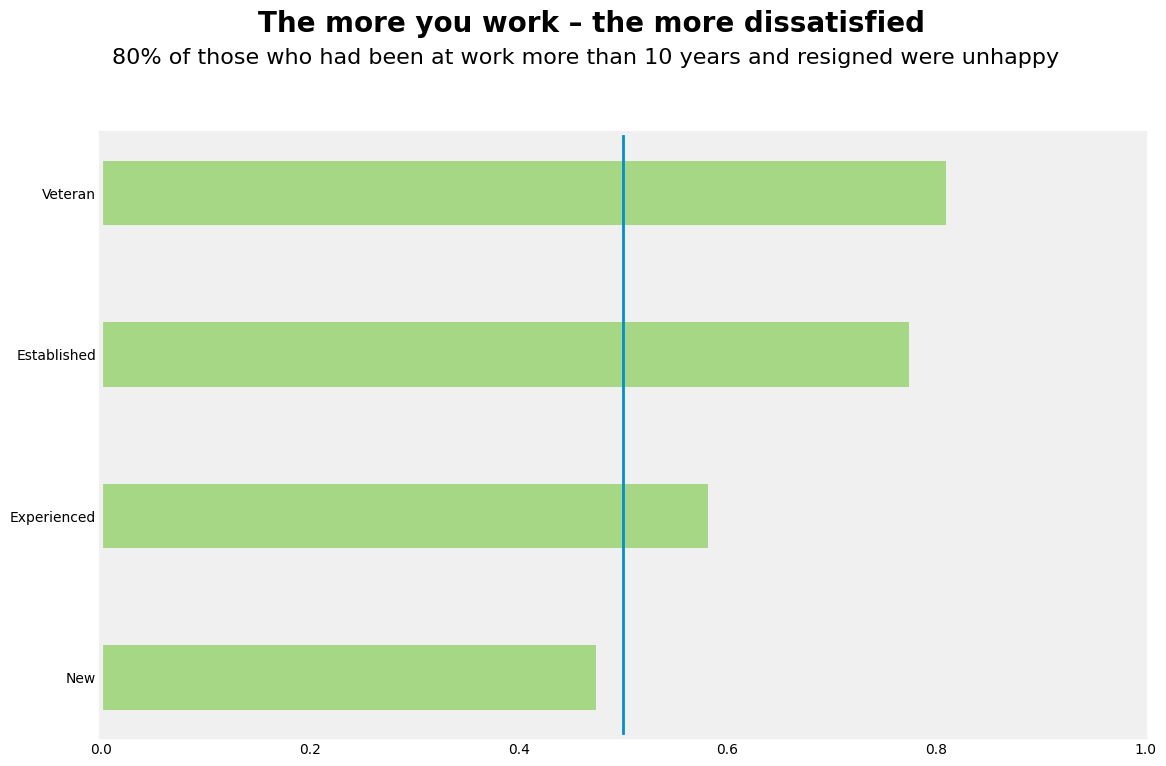

In [734]:

fig, ax = plt.subplots(figsize=(12,8))
ax.barh(y= perc.index, width=perc['dissatisfied'], height=0.4, color='#A6D785')
ax.text(s='The more you work – the more dissatisfied', x=0.15, y=4,
        size=20, weight='bold')
ax.text(s='80% of those who had been at work more than 10 years and resigned were unhappy',
        x=0.01, y=3.8,
        size=16)
ax.grid(None)
ax.axvline(x=0.5, linewidth = 2)
ax.set_xlim(0, 1)



We can also have a look on how it varies across genders.

In [762]:
gender_per = combined_updated.pivot_table(index='gender',
                                         values='dissatisfied').sort_values(by='dissatisfied')

In [763]:
gender_per

,dissatisfied
gender,
Male,0.574850
Female,0.656174


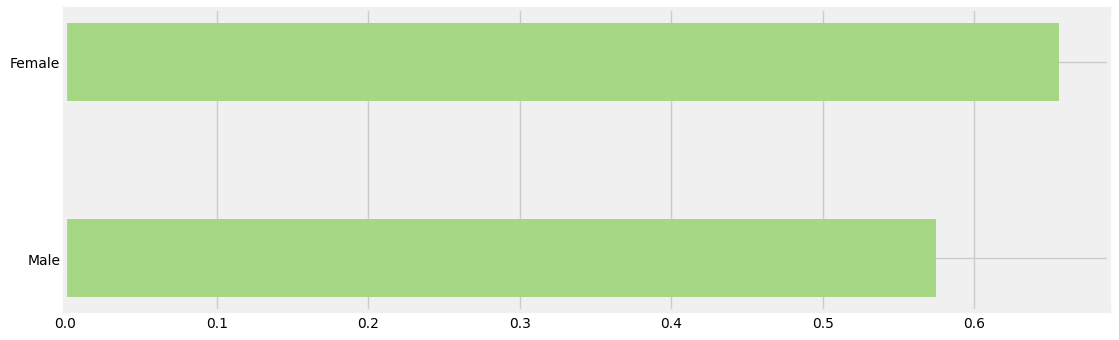

In [787]:
fig, ax = plt.subplots(figsize=(12,4))

ax.barh(y = gender_per.index, width=gender_per['dissatisfied'],
        height=0.4, color='#A6D785');

Next, we'll look at how many people in each age group resgined due to some kind of dissatisfaction
to be continued